In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage
import import_ipynb

from load_data import new_data
from scipy import misc

%matplotlib inline

plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

importing Jupyter notebook from load_data.ipynb


<h3>DEFINE MAIN FUNCTIONS</h3>

In [2]:
def sigmoid(Z):
    A = 1/(1 + np.exp(-Z))
    cache = Z
    return A, cache

In [3]:
def relu(Z):
    A = np.maximum(0, Z)
    cache = Z
    
    assert(A.shape == Z.shape)
    
    return A, cache

In [4]:
def sigmoid_backward(dA, cache):
    Z = cache
    s = A = 1/(1 + np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [5]:
def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    
    assert(dZ.shape == Z.shape)
    
    return dZ

<h3>INITIALIZE PARAMETERS</h3>

In [6]:
def init_params(n_x, n_h, n_y):
    np.random.seed(1)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2 }
    
    return parameters

<h3>LINEAR FORWARD PROPAGATION</h3>

In [7]:
def forward_propagation(A, W, b):
    Z = np.dot(W, A) + b
    
    cache = (A, W, b)
    return Z, cache

<h3>CHOOSE ACTIVATION FUNCTION FOR FORWARD PROPAGATION</h3>

In [8]:
def set_activation_function_forward(A_prev, W, b, activation):
    if activation == "relu":
        Z, linear_cache = forward_propagation(A_prev, W, b)
        A, activation_cache = relu(Z)
        
    if activation == "sigmoid":
        Z, linear_cache = forward_propagation(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    cache = (linear_cache, activation_cache)
        
    return A, cache

<h3>CALCULATE COST</h3>

In [9]:
def calc_cost(A, Y):
    m = Y.shape[1]
    
    cost = -(1/m) * np.sum(Y * np.log(A) + (1-Y)*np.log(1-A))
    cost = np.squeeze(cost)
    return cost

<h3>LINEAR BACKWARD PROPAGATION</h3>

In [10]:
def backward_propagation(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = (1/m) * np.dot(dZ, A_prev.T)
    db = (1/m) * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

<h3>CHOOSE ACTIVATION FUNCTION FOR BACKWARD PROPAGATION</h3>

In [11]:
def set_activation_function_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = backward_propagation(dZ, linear_cache)
    
    if activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = backward_propagation(dZ, linear_cache)
        
    return dA_prev, dW, db

<h3>UPDATE PARAMETERS</h3>

In [12]:
def update_params(params, grads, learning_rate):
    params["W1"] = params["W1"] - learning_rate * grads["dW1"]
    params["b1"] = params["b1"] - learning_rate * grads["db1"]
    params["W2"] = params["W2"] - learning_rate * grads["dW2"]
    params["b2"] = params["b2"] - learning_rate * grads["db2"]
    
    return params

<h3>HELPFUL FUNCTION (FORWARD PROP FOR SEVERAL LAYERS)</h3>

In [13]:
def model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2
    
    for l in range(1, L):
        A_prev = A 
        A, cache = set_activation_function_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    AL, cache = set_activation_function_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

<h3>LOAD DATA. DEFINE SIZES</h3>

In [14]:
train_x_orig, train_y, test_x_orig, test_y = new_data()

In [15]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 456
Number of testing examples: 110
Each image is of size: (150, 150, 3)
train_x_orig shape: (456, 150, 150, 3)
train_y shape: (1, 456)
test_x_orig shape: (110, 150, 150, 3)
test_y shape: (1, 110)


<h3>RESHAPE DATA TO FLOTTEN</h3>

In [16]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (67500, 456)
test_x's shape: (67500, 110)


<h3>SET DIMENSION SIZES</h3>

In [17]:
n_x = train_x.shape[0]
n_h = 7
n_y = 1

layers_dims = (n_x, n_h, n_y)

<h3>MAIN MODEL OF TRAINING FUNCTION</h3>

In [18]:
def model(X, Y, layers_dims, learning_rate = 0.0055, num_iterations = 3000, print_cost=False):
    grads = {}
    costs = []
    m = X.shape[1]
    (n_x, n_h, n_y) = layers_dims
    parameters = init_params(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(0, num_iterations):
        A1, cache1 = set_activation_function_forward(X, W1, b1, "relu")
        A2, cache2 = set_activation_function_forward(A1, W2, b2, "sigmoid")
        cost = calc_cost(A2, Y)
        
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        dA1, dW2, db2 = set_activation_function_backward(dA2, cache2, "sigmoid")
        dA0, dW1, db1 = set_activation_function_backward(dA1, cache1, "relu")
        
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        parameters = update_params(parameters, grads, learning_rate)
        
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.6928235757945347
Cost after iteration 100: 0.6548872290155391
Cost after iteration 200: 0.484828307943445
Cost after iteration 300: 0.31791043266025176
Cost after iteration 400: 0.12868369277930547
Cost after iteration 500: 0.1052191983208788
Cost after iteration 600: 0.08432779092795675
Cost after iteration 700: 0.06974949344066694
Cost after iteration 800: 0.058654814490186946
Cost after iteration 900: 0.049897213843402684
Cost after iteration 1000: 0.042868421333965054


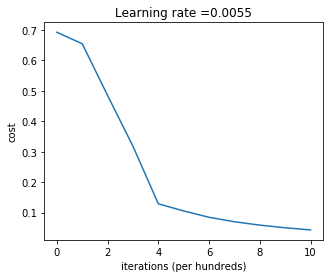

In [19]:
parameters = model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 1100, print_cost=True) #train NN

<h3>PREDICTION FUNCTION</h3>

In [20]:
def predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    probas, caches = model_forward(X, parameters)

    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

<h3>CHECK PREDCTION ON TRAINING DATASET</h3>

In [21]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.9956140350877192


<h3>CHECK PREDICTION ON DEV DATASET</h3>

In [22]:
predictions_train = predict(test_x, test_y, parameters)

Accuracy: 0.6090909090909091


<h3>TEST WITH LOADED IMAGE</h3>

Accuracy: 1.0
YOUR LUNGS HAVE PNEUMONIA


c:\users\1\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':


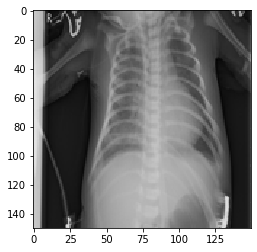

In [25]:
my_image = "1.jpeg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> pneumonia, 0 -> normal)

fname = "images/" + my_image

image = Image.open(fname).convert('RGB')
image = image.resize((150, 150))
my_image = np.array(image)
my_image = misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
my_image = my_image/255
my_predicted_image = predict(my_image, my_label_y, parameters)
ans = np.squeeze(my_predicted_image)
print("YOUR LUNGS NORMAL" if ans == 0 else "YOUR LUNGS HAVE PNEUMONIA")
plt.imshow(image)